In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data1=pd.read_csv('Ampara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Batticaloa.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Monaragala.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data = pd.concat([data1, data2, data3])
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length = len(data)

data

,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,3.500,33.615,64.375,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,3.000,33.260,65.500,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.875,32.900,65.625,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.250,32.690,64.375,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,3.375,32.300,66.000,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-12-21 13:00:00,3.000,32.250,61.000,13.0,21.0,3.0,12.0
2023-12-21 14:00:00,2.750,32.280,61.250,14.0,21.0,3.0,12.0
2023-12-21 15:00:00,3.750,31.720,64.750,15.0,21.0,3.0,12.0


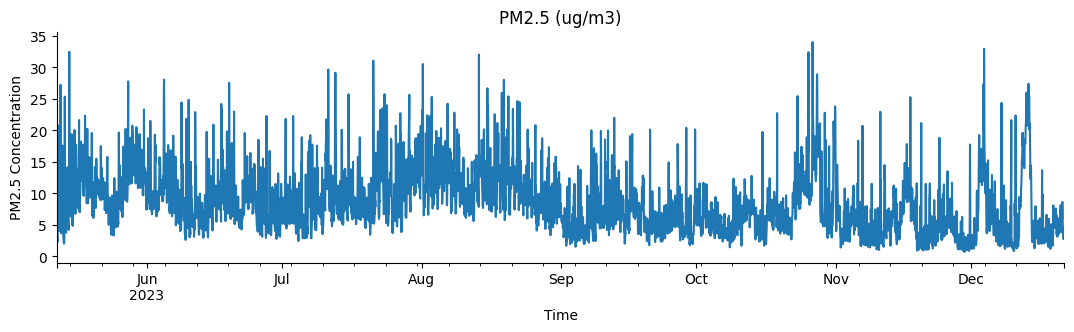

In [23]:
data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Splitting data into train and test sets
train_data = data.iloc[:int(Length*0.8)]
#val_data = data.iloc[int(Length*0.6):int(Length*0.8)]
test_data = data.iloc[int(Length*0.8):]
train_data


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,3.500000,33.615000,64.375000,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,3.000000,33.260000,65.500000,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.875000,32.900000,65.625000,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.250000,32.690000,64.375000,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,3.375000,32.300000,66.000000,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-11-06 19:00:00,5.933333,32.900000,66.733333,19.0,6.0,0.0,11.0
2023-11-06 20:00:00,7.100000,32.580000,67.483333,20.0,6.0,0.0,11.0
2023-11-06 21:00:00,20.733333,32.370000,67.916667,21.0,6.0,0.0,11.0


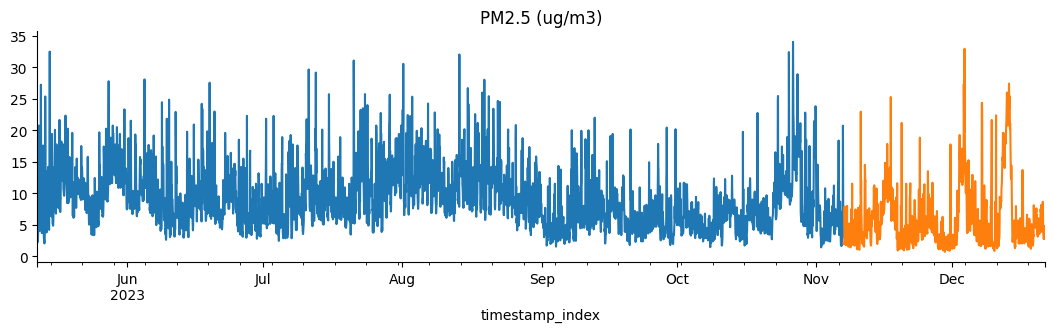

In [6]:
train_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
test_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
model_predictions = []

X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']
X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
y_test = test_data['PM2.5 (ug/m3)']

y_train

timestamp_index
2023-05-12 00:00:00     3.500000
2023-05-12 01:00:00     3.000000
2023-05-12 02:00:00     2.875000
2023-05-12 03:00:00     2.250000
2023-05-12 04:00:00     3.375000
                         ...    
2023-11-06 19:00:00     5.933333
2023-11-06 20:00:00     7.100000
2023-11-06 21:00:00    20.733333
2023-11-06 22:00:00    10.000000
2023-11-06 23:00:00     2.966667
Name: PM2.5 (ug/m3), Length: 4296, dtype: float64

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the initial training data
rf_model.fit(X_train, y_train)


for i in range(len(y_test)):
  y_pred = rf_model.predict(X_test.iloc[[i]])
  model_predictions.append(y_pred)

  X_train = pd.concat([X_train, X_test.iloc[[i]]], axis=0)
  y_train = pd.concat([y_train, pd.Series(y_test.iloc[i])], axis=0)

  rf_model.fit(X_train, y_train)
  '''if(i>100):
    break'''
  print(i)

print(model_predictions)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
#rf_model.summary()

print(len(model_predictions))

1074


In [22]:


# Assuming your test data is stored in DataFrame test_data with features and actual PM2.5 values
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
#X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])
#y_test = test_data['PM2.5 (ug/m3)']  # Actual PM2.5 values


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, model_predictions)
mse = mean_squared_error(y_test, model_predictions)
rmse = mean_squared_error(y_test, model_predictions, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.057547579143389
Mean Squared Error (MSE): 10.352305158031758
Root Mean Squared Error (RMSE): 3.217499830307961


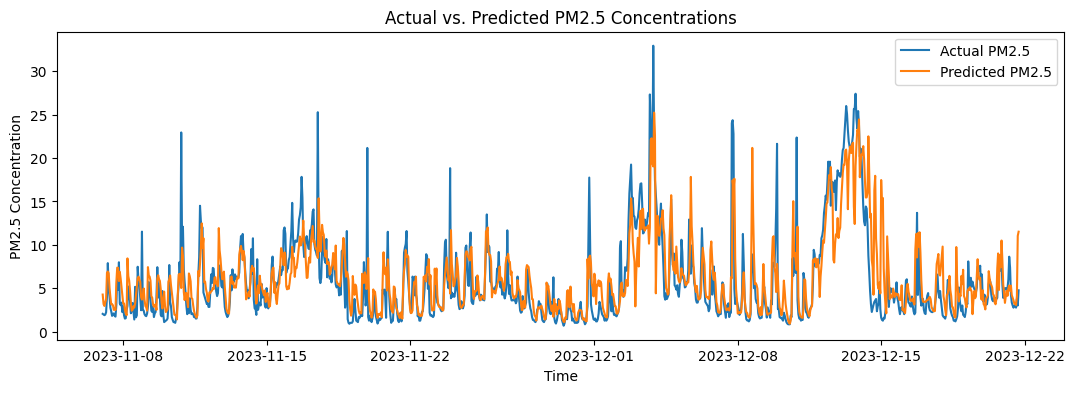

In [17]:
pred_df = pd.DataFrame(model_predictions, index=y_test.index, columns=['Predicted PM2.5'])
#pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted PM2.5'])

# Plot actual vs. predicted values
plt.figure(figsize=(13, 4))
plt.plot(y_test, label='Actual PM2.5')

plt.plot(pred_df, label='Predicted PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5 Concentrations')
plt.legend()
plt.show()


In [ ]:
#X_train = train_data.drop(columns=['PM2.5 (ug/m3)','Temperature (Celsius)','month','dayofweek','hour','Relative Humidity (%)'])  # Features
X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])
y_train = train_data['PM2.5 (ug/m3)']  # Target variable

# Instantiate the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
from joblib import dump,load
dump(rf_model,"random forest model cl1.joblib")

['random forest model cl1.joblib']

In [21]:
loaded_model = load("random forest model cl1.joblib")